#Refactoring the code for RNN training 

##Want as few training steps as possible...

##Source of [codebook](https://katoch.medium.com/twitter-emotion-recognition-using-rnn-d3cd59862957)

Data source: Gutenberg 2000 ~ 166K rows...

#To do: 


1.  Adding column modifications...!?
2.   List item



In [ ]:
#Need pip install tensorflow with... 

!pip install nlp
#!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 15.3 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd


In [ ]:
#Dec 7, 2022: Not sure what this piece of code is used for... 

import warnings
warnings.filterwarnings('ignore')

##Importing the dataset.. 

In [ ]:
# Load the Drive helper and mount

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load dataset for the 

df=pd.read_csv("/content/drive/MyDrive/Sean/Emoclass_Dec2022/Fear_arousal/Datasets/G2000_w400_Dec22_2022.csv")

In [ ]:
print(df.shape)
df.head(5)

(166316, 4)


,Unnamed: 0,text,emotion1,emotion2
0,0,of a safe next instant the street was empty ba...,panic,dread
1,1,aw now horn and pelt our peoples melt in cover...,dread,dread
2,2,an unwatched flame brightened for a moment an...,dread,dread
3,3,sign turn thee from thy morning mist or twili...,dread,dread
4,4,nted hathi oh but my tusks were red at bhurtpo...,horror,dread


In [ ]:
#What emotion categories do we have? 

#print(df['emotion1'].value_counts())

#print(df['emotion2'].value_counts())

In [ ]:
#Relabelling a column... if needed... 

df.rename(columns={"emotion2": "label"},inplace =True)

In [ ]:
#Let's see if we have missing values...No missing values... 

df.isna().sum()

Unnamed: 0    0
text          0
emotion1      0
label         0
dtype: int64

#Replacing the emotion words in the dataset.. 

In [ ]:
#Generate all the unique emotion words that then get replaced... 

a = df['emotion1'].unique().tolist()

#The list a is our list of variable responses from the dataset... 

words = a
for j in words: 
  df['text'] = df['text'].str.replace(j,'emotions')

In [ ]:
#Shuffling the dataset

df = df.sample(frac=1)

#Experimenting with truncating string length from both sides... 

##This section needs work

##Splitting string without word gap  [link here](https://stackoverflow.com/questions/250357/truncate-a-string-without-ending-in-the-middle-of-a-word)



In [ ]:
#Let's create a string length variable...

df['text_len'] = df['text'].str.len()

#Now, let's look at the value counts of this... 

df['text_len'].describe()

count    166316.000000
mean        404.632164
std           7.886066
min         206.000000
25%         402.000000
50%         403.000000
75%         404.000000
max         498.000000
Name: text_len, dtype: float64

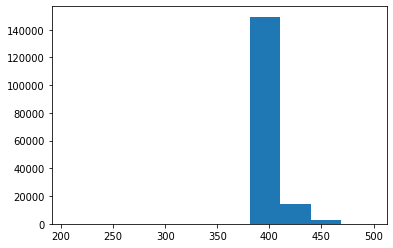

In [ ]:
#WHere would the... 

plt.hist(df['text_len'])
plt.show()

In [ ]:
#Shortening the string length...This isn't a bad solution...want to move to 
#The center of the string is at about 200 -> so like 75 on either sie... 


df['short_text'] = df['text'].str.slice(175,225)

df['shorttext_len'] = df['short_text'].str.len()

#Checking our transformation...

df['shorttext_len'].describe()

count    166316.000000
mean         49.999309
std           0.106346
min          31.000000
25%          50.000000
50%          50.000000
75%          50.000000
max          50.000000
Name: shorttext_len, dtype: float64

In [ ]:
#Let's see what this looks like...

df.head()

#Consider export here... 

,Unnamed: 0,text,emotion1,label,text_len,short_text,shorttext_len
12542,12542,thing before going to bed being careful not to...,afraid,fear,405,r from the galley i am emotions sir the galley...,50
120260,120260,commonalty including myself tennyson has a ri...,concerning,concern,401,njoyable than those emotionsing the happy fami...,50
46823,46823,he romans for war for it is not reported that ...,fear,fear,404,ain arguments of their emotions for though the...,50
41739,41739,and they stand with downcast looks a mute and ...,fearful,fear,403,om him fly and malea emotionsful headland fann...,50
128058,128058,glad to have some conversation with you emoti...,fear,fear,405,ilities persuades you i emotions that i am abl...,50


In [ ]:
#Create a new dataframe... 

df=pd.DataFrame(df,columns=['short_text','label'])

#Let's check this... 

df.head()

,short_text,label
12542,r from the galley i am emotions sir the galley...,fear
120260,njoyable than those emotionsing the happy fami...,concern
46823,ain arguments of their emotions for though the...,fear
41739,om him fly and malea emotionsful headland fann...,fear
128058,ilities persuades you i emotions that i am abl...,fear


# Splitting dataset into train, validate and test datasets
---

Dec 12: May want to split dataset in half again...to see impact of sample size on training...hypothesis: more data will increase accuracy...with RNN....

In [ ]:
#This seems to be hte simplest way to do the 3 way training split...
#And then this outputs 3 different dataframes... 

train, validate, test = np.split(df, 
                       [int(.6*len(df)), int(.8*len(df))])

In [ ]:
#Checking to make sure that all three are dataframes... 

type(train),type(validate),type(test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [ ]:
#Looking at the dataframe...

train.head()
print(train.shape)

(99789, 2)


# 6. Preparing the Labels

## In terms of sequence, I think this should go right below the dataframe -> List code

In [ ]:
#Converting the pandas dataframe into a list of labels... 

trainlabel=train['label'].tolist()
vallabel=validate['label'].tolist()
testlabel=test['label'].tolist()

{'concern', 'anxiety', 'fear', 'dread', 'worry', 'calm'}


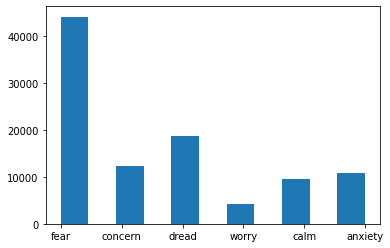

In [ ]:
#Convert the labels into a a set(just unique values) and print them...
#Labels is a list... 

classes = set(trainlabel)
print(classes)

#What is the distribution of emotions in our literature? Histogram...  
#Bins 11 -> number of classifiers, with the number of spaces imbetween...

plt.hist(trainlabel, bins=11)
plt.show()

In [ ]:
#One thing that ***I don't*** like about this way of doing things is that the ordering of the variables is a bit...!?!

classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [ ]:
#This is simply a dictionary -> and it becomes an input into an 

classes_to_index

#Dec 12, I'm not sure what this is supposed to be for.. 

index_to_classes

{0: 'concern', 1: 'anxiety', 2: 'fear', 3: 'dread', 4: 'worry', 5: 'calm'}

In [ ]:
#Creating a lambda function...called "names_to_ids"

names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [ ]:
#Applying the names_to_ids functions to the labels

train_labels = names_to_ids(trainlabel)
val_labels = names_to_ids(vallabel)
test_labels = names_to_ids(testlabel)

#Testing out the labels...
print(train_labels[10])

3


In [ ]:
#Dec 13, 2022 - I am getting an error because my x and y are not matching...
#train_labels is an ndarray -> 99789... 
#val_labels is: 33253

#val_labels


# 4. Tokenizing the Tweets

## I don't know what "fit on texts" is supposed to do... 

See reference [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)


In [ ]:
#Converting the different pandas dataframes into a list of text fields...
#This is like prime for being 

traintext=train['short_text'].tolist()
valtext=validate['short_text'].tolist()
testtext=test['short_text'].tolist()

In [ ]:
#What's the length of each of these things... 

print(len(traintext)),print(len(valtext)),print(len(testtext))

99789
33263
33264


(None, None, None)

In [ ]:
#Importing the tokenizer...
#Input into the tokenizer is a list

from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
#Input into the tokenizer is a list

tokenizer = Tokenizer(num_words=1000, oov_token='<UNK>')

#I think that this is the missing piece...I'm not really sure what it does...  

tokenizer.fit_on_texts(traintext)
#tokenizer.fit_on_texts(valtext)

#Testing the tokenization... 

#print(tokenizer.texts_to_sequences([tweets[10]]))

## 5. Padding and Truncating Sequences

See this resource on padding sequence by Keras
https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#Creating a function that tokenizes and pads the sequences...

def get_sequences(tokenizer, texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [ ]:
#Applying the function to tokenize and pad... to all test,validate and test
#Syntax: val_sequences = get_sequences(tokenizer, val_tweets)

padded_train_sequences = get_sequences(tokenizer, traintext)
val_sequence = get_sequences(tokenizer,valtext)
test_sequence = get_sequences(tokenizer,testtext)


In [ ]:
#Let's see what kind of shape these things are...
#padded_train_sequences is an Ndarray is 99789

#Alright...val_sequence is 99789....

#val_sequence



# 7. Creating the Model

##Dec 7: Look into embedding more... 


1.   What is the 2nd argument in it? Words, X and input length...
2.   List item


In [ ]:
#I think that the embedding layer works on the number of words... 
#

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(1000, 64, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            64000     
                                                                 
 bidirectional (Bidirectiona  (None, 50, 20)           6000      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 20)               2480      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 126       
                                                                 
Total params: 72,606
Trainable params: 72,606
Non-trainable params: 0
_________________________________________________________________


## 8. Training the Model

In [ ]:
#Having the callbacks option on means that the model stops once you are like over-generalizing... 
#Let's leave the callback option on for now...


h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequence, val_labels),
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
   ]
)

Epoch 1/10
3119/3119 [==============================] - 219s 68ms/step - loss: 1.0874 - accuracy: 0.5899 - val_loss: 0.9430 - val_accuracy: 0.6415
Epoch 2/10
3119/3119 [==============================] - 210s 67ms/step - loss: 0.8928 - accuracy: 0.6627 - val_loss: 0.8785 - val_accuracy: 0.6655
Epoch 3/10
3119/3119 [==============================] - 206s 66ms/step - loss: 0.8373 - accuracy: 0.6822 - val_loss: 0.8541 - val_accuracy: 0.6747
Epoch 4/10
3119/3119 [==============================] - 209s 67ms/step - loss: 0.8060 - accuracy: 0.6927 - val_loss: 0.8420 - val_accuracy: 0.6812
Epoch 5/10
3119/3119 [==============================] - 206s 66ms/step - loss: 0.7835 - accuracy: 0.7019 - val_loss: 0.8467 - val_accuracy: 0.6806
Epoch 6/10
3119/3119 [==============================] - 204s 65ms/step - loss: 0.7645 - accuracy: 0.7092 - val_loss: 0.8304 - val_accuracy: 0.6842
Epoch 7/10
3119/3119 [==============================] - 194s 62ms/step - loss: 0.7491 - accuracy: 0.7147 - val_loss: 0

#9. Evaluating the model 

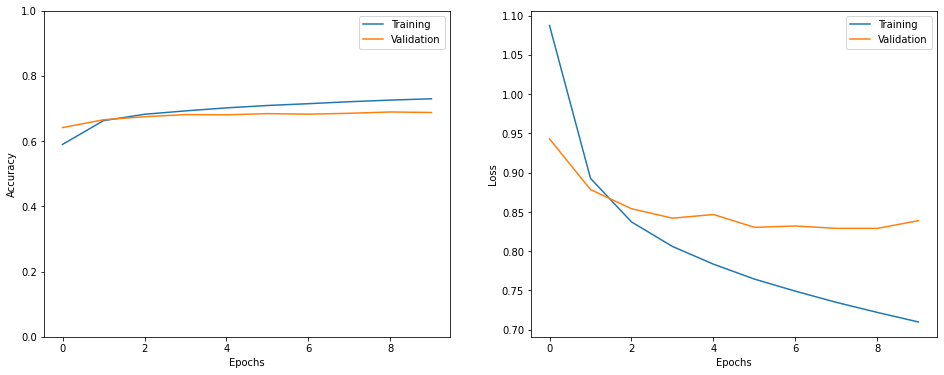

In [ ]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

In [ ]:
#Running the model on the test sequence and test labels... 

eval = model.evaluate(test_sequence, test_labels)

1040/1040 [==============================] - 13s 12ms/step - loss: 0.8412 - accuracy: 0.6815


In [ ]:
#preds = model.predict_classes(test_sequences)
preds=model.predict(test_sequences) 
classes_x=np.argmax(preds,axis=1)
preds.shape, test_labels.shape

NameError: ignored

#Saving the model 

##Questions: At what point do we save the model...


1.   Resolve the character / length piece in looking at the inference dataset...
2.   I want the 75% run / run before I save it... 



In [ ]:
#So this works but we need to make sure that we install Keras as a dependency 

from keras.models import load_model

#model.save("my_model")

#fearmodel.save('/content/drive/MyDrive/Sean/Emoclass_Dec2022/Fear_arousal/Fear_Arousal_Model_6cat_dec10,2022')